# 👨‍🏫 “Chappie vs Tracy: ANN Showdown on MNIST”
![pic](ct.png)

Train and compare two hand-coded Artificial Neural Networks (ANNs) — Chappie and Tracy — on the full MNIST dataset (10 classes), from scratch using NumPy.



🧠 Dataset: MNIST (0–9 digits)
Input size: 784 (28x28 flattened)

Output: 10 classes → one-hot encoded targets

Normalize pixel values (0–255 → 0–1)

Use train/test split from sklearn or keras.datasets

To make learning Artificial Neural Networks (ANNs) exciting, we introduce two digital warriors: Chappie and Tracy — each representing a different neural network architecture.

## Chappie 
Architecture: 1 hidden layer (784 → 64 → 10)

Personality: Fast, lightweight, and efficient.

Strengths:

Simpler structure

Trains quickly

Easier to visualize and debug

Weaknesses:

May struggle with complex patterns

Limited capacity to learn deep features

## Tracy 
Architecture: 2 hidden layers (784 → 128 → 64 → 10)

Personality: Smart, analytical, and detail-oriented.

Strengths:

Learns more abstract features

Can model complex relationships

Higher flexibility and power

Weaknesses:

Takes longer to train

Slightly harder to tune

In this notebook, Tracy and Chappie go head-to-head on the MNIST battlefield! Let’s see who classifies handwritten digits better!

In [2]:
# =======================
# Step 1: Load & Preprocess MNIST (CSV-based)
# =======================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical


In [17]:
# Load MNIST CSV file (Kaggle format: label + 784 pixels)
train_df = pd.read_csv("mnist_train.csv")

In [18]:
train_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Split into features and labels
X = train_df.drop("label", axis=1).values / 255.0
y = to_categorical(train_df["label"].values, num_classes=10)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Step 2: Activation Functions & Derivatives
# =======================

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)

In [7]:
# =======================
# Step 3: Loss Function
# =======================

def cross_entropy(y_pred, y_true):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m


In [8]:
# Step 4: Initialize Weights
# =======================

def initialize_parameters(layer_dims):
    np.random.seed(42)
    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters[f"W{l}"] = np.random.randn(layer_dims[l-1], layer_dims[l]) * np.sqrt(2. / layer_dims[l-1])
        parameters[f"b{l}"] = np.zeros((1, layer_dims[l]))
    return parameters

In [9]:
# Step 5: Forward Propagation
# =======================

def forward_propagation(X, parameters, use_two_layers=False):
    cache = {}
    cache['A0'] = X

    Z1 = np.dot(cache['A0'], parameters['W1']) + parameters['b1']
    A1 = relu(Z1)
    cache['Z1'], cache['A1'] = Z1, A1

    if use_two_layers:
        Z2 = np.dot(A1, parameters['W2']) + parameters['b2']
        A2 = relu(Z2)
        cache['Z2'], cache['A2'] = Z2, A2

        Z3 = np.dot(A2, parameters['W3']) + parameters['b3']
        A3 = softmax(Z3)
        cache['Z3'], cache['A3'] = Z3, A3
    else:
        Z2 = np.dot(A1, parameters['W2']) + parameters['b2']
        A2 = softmax(Z2)
        cache['Z2'], cache['A2'] = Z2, A2

    return cache


In [10]:
# Step 6: Backward Propagation
# =======================

def backward_propagation(y_true, parameters, cache, use_two_layers=False):
    grads = {}
    m = y_true.shape[0]

    if use_two_layers:
        dZ3 = cache['A3'] - y_true
        grads['dW3'] = np.dot(cache['A2'].T, dZ3) / m
        grads['db3'] = np.sum(dZ3, axis=0, keepdims=True) / m

        dA2 = np.dot(dZ3, parameters['W3'].T)
        dZ2 = dA2 * relu_derivative(cache['Z2'])
        grads['dW2'] = np.dot(cache['A1'].T, dZ2) / m
        grads['db2'] = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, parameters['W2'].T)
        dZ1 = dA1 * relu_derivative(cache['Z1'])
        grads['dW1'] = np.dot(cache['A0'].T, dZ1) / m
        grads['db1'] = np.sum(dZ1, axis=0, keepdims=True) / m
    else:
        dZ2 = cache['A2'] - y_true
        grads['dW2'] = np.dot(cache['A1'].T, dZ2) / m
        grads['db2'] = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, parameters['W2'].T)
        dZ1 = dA1 * relu_derivative(cache['Z1'])
        grads['dW1'] = np.dot(cache['A0'].T, dZ1) / m
        grads['db1'] = np.sum(dZ1, axis=0, keepdims=True) / m

    return grads

In [11]:
# Step 7: Update Parameters
# =======================

def update_parameters(parameters, grads, learning_rate):
    for key in parameters.keys():
        parameters[key] -= learning_rate * grads['d' + key]
    return parameters


In [12]:
# Step 8: Training
# =======================

def train(X, y, layers, epochs=50, lr=0.1, use_two_layers=False):
    parameters = initialize_parameters(layers)
    loss_history = []
    for i in range(epochs):
        cache = forward_propagation(X, parameters, use_two_layers)
        y_hat = cache['A3'] if use_two_layers else cache['A2']
        loss = cross_entropy(y_hat, y)
        loss_history.append(loss)
        grads = backward_propagation(y, parameters, cache, use_two_layers)
        parameters = update_parameters(parameters, grads, lr)
        if i % 5 == 0:
            print(f"Epoch {i} | Loss: {loss:.4f}")
    return parameters, loss_history

In [13]:
# Step 9: Evaluation
# =======================

def evaluate(X, y, parameters, use_two_layers=False):
    cache = forward_propagation(X, parameters, use_two_layers)
    y_hat = cache['A3'] if use_two_layers else cache['A2']
    predictions = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == labels)
    print("Sample predictions:", predictions[:10])
    print("Sample labels     :", labels[:10])
    return accuracy

In [16]:
# Step 10: Run Models
# =======================

print("Training Chappie (1 hidden layer)...")
chappie_arch = [784, 64, 10]
chappie_params, chappie_loss = train(X_train, y_train, chappie_arch, use_two_layers=False)



Training Chappie (1 hidden layer)...
Epoch 0 | Loss: 2.4199
Epoch 5 | Loss: 1.9641
Epoch 10 | Loss: 1.6372
Epoch 15 | Loss: 1.3590
Epoch 20 | Loss: 1.1457
Epoch 25 | Loss: 0.9921
Epoch 30 | Loss: 0.8814
Epoch 35 | Loss: 0.7997
Epoch 40 | Loss: 0.7376
Epoch 45 | Loss: 0.6889


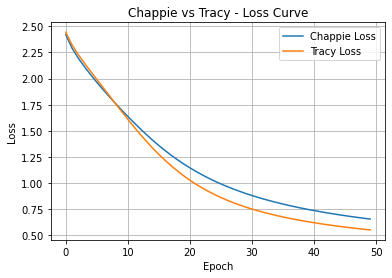

In [15]:
# Step 11: Plot Loss
# =======================

plt.plot(chappie_loss, label="Chappie Loss")
plt.plot(tracy_loss, label="Tracy Loss")
plt.title("Chappie vs Tracy - Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

